<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/gasquality/hydrocarbon_dew_point_of_natural_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hydrocarbon dew point of natural gas
The hydrocarbon dew point of natural gas is a critical parameter in the natural gas industry that refers to the temperature at which hydrocarbon components in the gas mixture begin to condense into liquid form. Natural gas primarily consists of hydrocarbons, such as methane, ethane, propane, and butane, and these components remain in a gaseous state at high temperatures and pressures encountered in gas pipelines and processing facilities.

However, as natural gas is transported or undergoes pressure reduction, its temperature can drop, causing certain hydrocarbons to transition from a gas to a liquid phase. This phenomenon is known as hydrocarbon dew point. The temperature at which this condensation occurs depends on the composition of the natural gas mixture, with heavier hydrocarbons condensing at higher temperatures than lighter ones.

Understanding and controlling the hydrocarbon dew point is essential in the natural gas industry for several reasons:

Equipment Protection: Liquid hydrocarbons can be corrosive and can damage pipelines, valves, and other equipment. Maintaining the gas temperature above the hydrocarbon dew point helps prevent equipment corrosion and damage.

Gas Quality: Hydrocarbon condensation can affect the quality of natural gas, impacting its energy content and potentially leading to operational issues in end-use applications like heating and power generation.

Safety: The presence of liquid hydrocarbons in pipelines can pose safety risks, such as the formation of hydrates or wax deposits, which can obstruct flow and lead to accidents.

Compliance: Many natural gas specifications and regulations require that the gas meet specific quality standards, including hydrocarbon dew point limits.

To manage the hydrocarbon dew point, gas processing facilities use various techniques, including heat exchange, pressure reduction, and the removal of heavy hydrocarbons. By carefully controlling these factors, the industry ensures that natural gas remains in a safe and usable state throughout its journey from production to distribution and consumption.

In [1]:
%%capture
!pip install neqsim

#Calculation of dew and bubble points

dew point temperature  274.8507677589821  K  pressure  10.0  bara
buble point temperature  155.42940315451594  K 10.0  bara
buble point pressure  65.1502714869753  bara  223.14999999999998  K
buble point pressure  10.06055839453803  bara  275.0  K


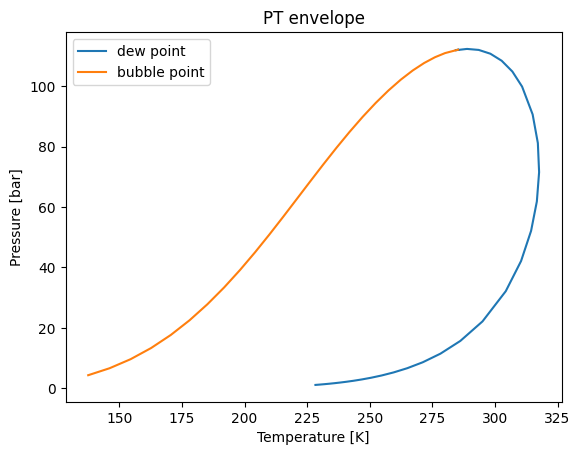

In [6]:
# Calculation of dew and bubble points

import neqsim
from neqsim.thermo.thermoTools import dewt, bubt,bubp, dewp, fluid
import matplotlib.pyplot as plt

fluid0_HC = fluid('srk')
fluid0_HC.addComponent('methane',0.7)
fluid0_HC.addComponent('ethane',0.1)
fluid0_HC.addComponent('propane',0.1)
fluid0_HC.addComponent('n-butane',0.1)
fluid0_HC.setMixingRule("classic")

fluid0_HC.setPressure(10.0, 'bara')
fluid0_HC.setTemperature(0.0, 'C')

dewtemperature = dewt(fluid0_HC)
print('dew point temperature ', fluid0_HC.getTemperature('K'), ' K', ' pressure ', fluid0_HC.getPressure('bara'), ' bara')

#set inital guess
fluid0_HC.setTemperature(-140.0, 'C')
bubtemperature = bubt(fluid0_HC)
print('buble point temperature ', fluid0_HC.getTemperature('K'), ' K', fluid0_HC.getPressure('bara'), ' bara')

#set inital guess
fluid0_HC.setTemperature(-50.0, 'C')
fluid0_HC.setPressure(30.0, 'bara')
bubpressure =bubp(fluid0_HC)
print('buble point pressure ', fluid0_HC.getPressure('bara'), ' bara ',  fluid0_HC.getTemperature('K'), ' K')

#set inital guess
fluid0_HC.setTemperature(275.0, 'K')
fluid0_HC.setPressure(30.0, 'bara')
dewpressure =dewp(fluid0_HC)
print('buble point pressure ', fluid0_HC.getPressure('bara'), ' bara ',  fluid0_HC.getTemperature('K'), ' K')

from neqsim.neqsimpython import jNeqSim
thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(fluid0_HC)
thermoOps.calcPTphaseEnvelope()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

#Models for calculations of hydrocarbon dew point
Calculating the hydrocarbon dew point of natural gas typically involves the use of empirical models or software programs that take into account the gas composition, pressure, and temperature conditions. Here are some commonly used models and methods for calculating the hydrocarbon dew point:

1. Standing-Katz Chart:
   - The Standing-Katz Chart is a graphical method that allows users to estimate the hydrocarbon dew point by plotting the gas composition, pressure, and temperature on a chart. This method is useful for quick estimations but may not be as precise as numerical models.

2. GPSA (Gas Processors Suppliers Association) Engineering Data Book:
   - The GPSA Engineering Data Book provides empirical correlations and charts for estimating the hydrocarbon dew point based on gas composition, pressure, and temperature. It is widely used in the oil and gas industry.

3. GPA (Gas Processors Association) TP-27:
   - GPA TP-27 is a widely used method for calculating the hydrocarbon dew point of natural gas. It provides a comprehensive set of equations and data for accurate predictions, considering various hydrocarbon components.

4. SRK (Soave-Redlich-Kwong) Equation of State:
   - Equation of state models like SRK can be used to predict phase behavior, including the hydrocarbon dew point, of natural gas. These models require detailed information about the gas composition and are more accurate but also more complex than empirical methods.

5. Peng-Robinson Equation of State:
   - Similar to the SRK equation, the Peng-Robinson equation of state is a thermodynamic model that can be used to calculate the hydrocarbon dew point based on gas composition, pressure, and temperature. It is also a powerful tool for phase equilibrium calculations.

6. The UMR-PRU-EoS
  - The  UMR-PRU-EoS model is a predictive equation of state that
combines the PR EoS with an original UNIFAC-type model for the excess Gibbs energy (GE), through the universal mixing rules (UMR). The model is called UMR-PRU (Universal Mixing Rule Peng Robinson UNIFAC) and it is the most accurate model for calculation of cricondenbar and
hydrocarbon dew points we have tested until now

#Use of NeqSim and the UMR-PRU EoS

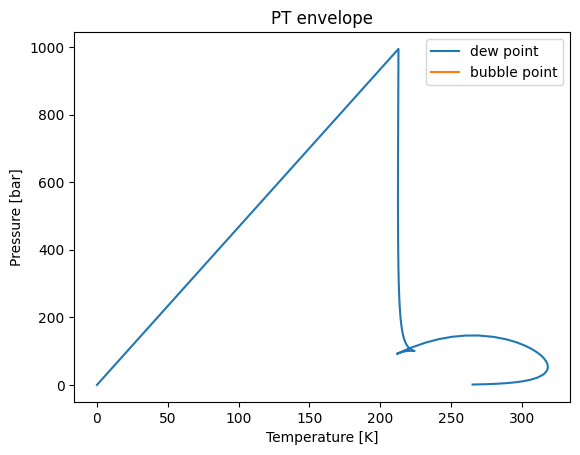

In [3]:
import neqsim
from neqsim.neqsimpython import jNeqSim
from neqsim.thermo.thermoTools import *
import matplotlib.pyplot as plt

fluid0_HC = fluid('umr')
fluid0_HC.addComponent('nitrogen',1.50384212276727)
fluid0_HC.addComponent('CO2',0.529539570730345)
fluid0_HC.addComponent('methane',92.8303477134498)
fluid0_HC.addComponent('ethane',3.4970377157638)
fluid0_HC.addComponent('propane',0.418221197906017)
fluid0_HC.addComponent('i-butane',0.380054178331476)
fluid0_HC.addComponent('n-butane',0.0582006527706574)
fluid0_HC.addComponent('22-dim-C3',0.00515867585725002)
fluid0_HC.addComponent('i-pentane',0.0620607111935889)
fluid0_HC.addComponent('n-pentane',0.0158347521527336)
fluid0_HC.addComponent('c-C5',0.0257579825598445)
fluid0_HC.addComponent('22-dim-C4',0.00931692731809784)
fluid0_HC.addComponent('23-dim-C4',0.0180174411828985)
fluid0_HC.addComponent('2-m-C5',0.0437804423449465)
fluid0_HC.addComponent('3-m-C5',0.0252426204923337)
fluid0_HC.addComponent('n-hexane',0.00697254561926368)
fluid0_HC.addComponent('benzene',0.000666939146190439)
fluid0_HC.addComponent('c-hexane',0.246403134725436)
fluid0_HC.addComponent('n-heptane',0.0422848348039577)
fluid0_HC.addComponent('toluene',0.00176839925126253)
fluid0_HC.addComponent('c-C7',0.19305790959197)
fluid0_HC.addComponent('n-octane',0.0123787686303101)
fluid0_HC.addComponent('m-Xylene',0.013156796366694)
fluid0_HC.addComponent('c-C8',0.00339071314488895)
fluid0_HC.addComponent('n-nonane',0.00758916287507585)
fluid0_HC.addComponent('nC10',0.000193663073477182)
fluid0_HC.addComponent('nC11',1.0e-6)
fluid0_HC.addComponent('nC12',1.0e-8)
fluid0_HC.setMixingRule("HV", "UNIFAC_UMRPRU")

thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(fluid0_HC)
thermoOps.calcPTphaseEnvelope()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

#PhaseOpt
The PhaseOpt technology is a tool for online monitoring of hydrocarbon dew point in rich gas
pipelines. Accurate prediction of hydrocarbon dew point temperature and pressure is of great
importance to obtain effective utilization of the natural gas pipelines and process plants without
hydrocarbon liquid drop-out. Finally, given the deregulated European gas market and varying range
of gas quality, a tool for reliable determination of the hydrocarbon dew point for pipeline gas is
increasingly important.
The PhaseOpt technology is illustrated in the figure below and consists of:

* A sample system optimized to handle trace component analysis and traces of liquid glycol in the
gas
* An online process GC-analyser providing extended compositional analysis with detailed
composition up to C12
* A reliable thermodynamic model for hydrocarbon (HC) dew point calculations with focus on
cricondenbar
* Implementation of methods for online cricondenbar measurement into control system of
pipelines and process plants

http://members.igu.org/old/IGU%20Events/igrc/igrc-2014/papers/wo4-4_skouras.pdf

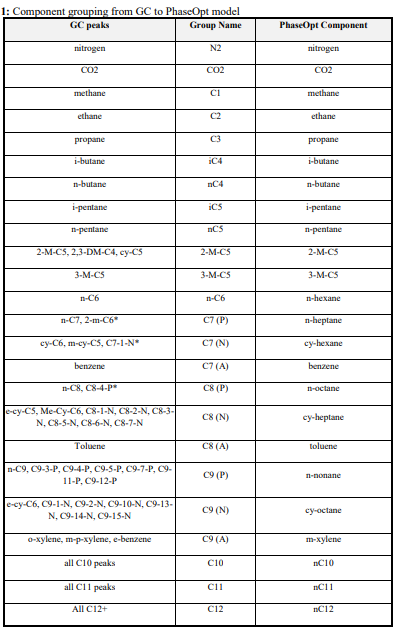

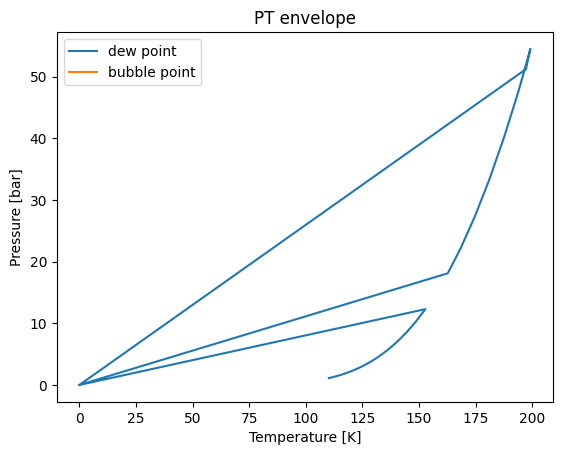

In [4]:
import neqsim
from neqsim.neqsimpython import jNeqSim
from neqsim.thermo.thermoTools import *
import matplotlib.pyplot as plt

fluid0_HC = fluid('umr')
fluid0_HC.addComponent('nitrogen',1.50384212276727)
fluid0_HC.addComponent('CO2',0.529539570730345)
fluid0_HC.addComponent('methane',92.8303477134498)
fluid0_HC.addComponent('ethane',3.4970377157638)
fluid0_HC.addComponent('propane',0.418221197906017)
fluid0_HC.addComponent('i-butane',0.380054178331476)
fluid0_HC.addComponent('n-butane',0.0582006527706574)
fluid0_HC.addComponent('i-pentane',0.0620607111935889)
fluid0_HC.addComponent('n-pentane',0.0158347521527336)
fluid0_HC.addComponent('c-C5',0.0257579825598445)
fluid0_HC.addComponent('2-m-C5',0.0437804423449465)
fluid0_HC.addComponent('3-m-C5',0.0252426204923337)
fluid0_HC.addComponent('n-hexane',0.00697254561926368)
fluid0_HC.addComponent('benzene',0.000666939146190439)
fluid0_HC.addComponent('c-hexane',0.246403134725436)
fluid0_HC.addComponent('n-heptane',0.0422848348039577)
fluid0_HC.addComponent('toluene',0.00176839925126253)
fluid0_HC.addComponent('c-C7',0.19305790959197)
fluid0_HC.addComponent('n-octane',0.0123787686303101)
fluid0_HC.addComponent('m-Xylene',0.013156796366694)
fluid0_HC.addComponent('c-C8',0.00339071314488895)
fluid0_HC.addComponent('n-nonane',0.00758916287507585)
fluid0_HC.addComponent('nC10',0.000193663073477182)
fluid0_HC.addComponent('nC11',1.0e-6)
fluid0_HC.addComponent('nC12',1.0e-8)
#fluid0_HC.setMixingRule("HV", "UNIFAC_UMRPRU")

thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(fluid0_HC)
thermoOps.calcPTphaseEnvelope()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

#Simplified PhaseOpt (sPhaseOpt)
Simplified PhaseOpt is a method used for processing plant having a standard C6+ process GC.

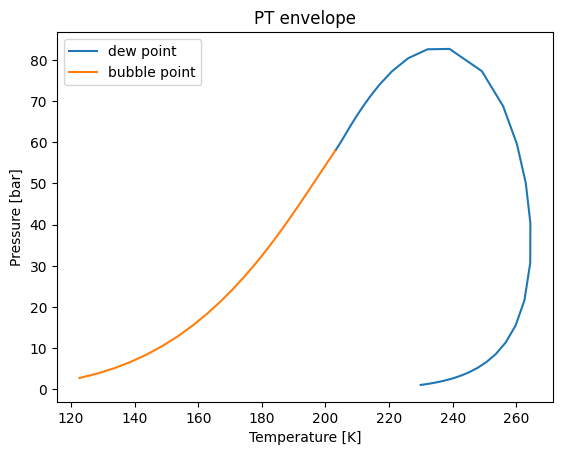

In [5]:
import neqsim
from neqsim.neqsimpython import jNeqSim
from neqsim.thermo.thermoTools import *
import matplotlib.pyplot as plt

fluid0_HC = fluid('umr')
fluid0_HC.addComponent('nitrogen',1.50384212276727)
fluid0_HC.addComponent('CO2',0.529539570730345)
fluid0_HC.addComponent('methane',92.8303477134498)
fluid0_HC.addComponent('ethane',3.4970377157638)
fluid0_HC.addComponent('propane',0.418221197906017)
fluid0_HC.addComponent('i-butane',0.380054178331476)
fluid0_HC.addComponent('n-butane',0.0582006527706574)
fluid0_HC.addComponent('i-pentane',0.0620607111935889)
fluid0_HC.addComponent('n-pentane',0.0158347521527336)
fluid0_HC.addComponent('2-m-C5',0.0437804423449465)
fluid0_HC.addComponent('3-m-C5',0.0252426204923337)
fluid0_HC.addComponent('n-hexane',0.00697254561926368)
fluid0_HC.addComponent('n-heptane',0.0422848348039577)
fluid0_HC.setMixingRule("HV", "UNIFAC_UMRPRU")

thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(fluid0_HC)
thermoOps.calcPTphaseEnvelope()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()